In [109]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
print(tf.__version__)

2.16.1


In [111]:
fashion_mnist = keras.datasets.fashion_mnist

In [112]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() #train test segreagation

In [113]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [114]:
class_names = ['T-shirt/top','Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

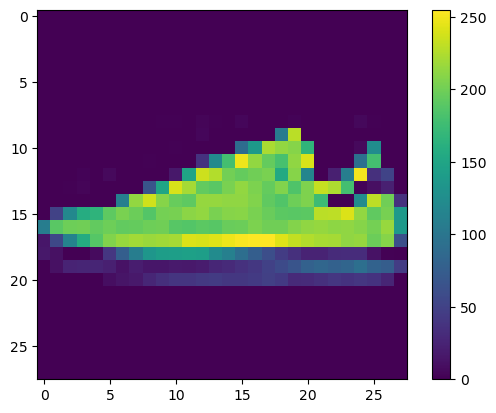

In [115]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

In [116]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [117]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [118]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Layer 1 input
    keras.layers.Dense(128, activation='relu'), # Layer 2 hidden
    keras.layers.Dense(10, activation='softmax') #Layer 3 ouput
],name = "mnist")

In [119]:
print(model.summary())

Model: "mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [120]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [125]:
model.fit(x=train_images,y=train_labels, epochs=5,shuffle=True)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7768 - loss: 0.6462
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8607 - loss: 0.3841
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8749 - loss: 0.3456
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8820 - loss: 0.3343
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8906 - loss: 0.3067


In [126]:
test_loss, test_accuracy = model.evaluate(x=test_images, y=test_labels)
print("Test accuracy: ", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8741 - loss: 0.3799
Test accuracy:  0.871399998664856


In [127]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
print(predictions.shape)

(10000, 10)


In [128]:
np.argmax(predictions[25])

2

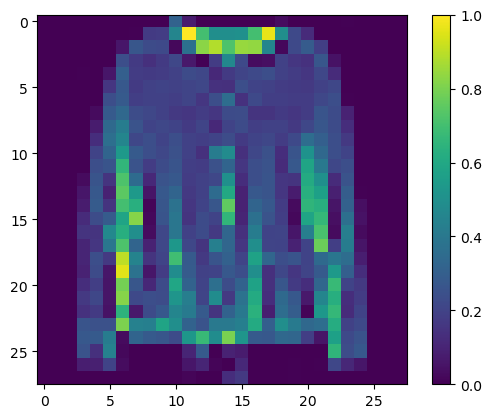

In [129]:
plt.figure()
plt.imshow(test_images[25])
plt.colorbar()
plt.grid(False)
plt.show()

In [130]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label,class_names):

    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    showimage(image, class_names[correct_label], predicted_class)


def showimage(img,label,guess):
 
    fig, ax = plt.subplots(figsize=(5, 5))
    
    cax = ax.imshow(img, cmap=plt.cm.binary)
    
    ax.set_title(f"Expected: {label}", color='black')
    ax.set_xlabel(f"Guess: {guess}", color='black')
    
    fig.colorbar(cax)
    ax.grid(False)

    
    plt.show() 

def get_number():
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return num
            else:
                print("Try again...")


Pick a number: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


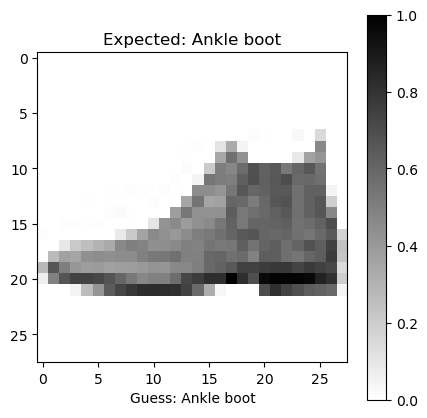

In [131]:
num = get_number()
img = test_images[num]
label = test_labels[num]
predict(model, img, label ,class_names)